# UVdim analysis for NGC 346

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

In [2]:
input_file = '/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/Catalogs/catalog.xym'
data = pd.read_csv(input_file, sep='\t')

mag_limit = -5. 
data_spatial = data[(data['F814W'] < mag_limit) & (data['F555W'] < mag_limit)]

In [3]:
# Plot the spatial distribution and the selected old cluster (B 90) and young one (NGC 346)

# center and approximative radius of the young cluster 
center_NGC346 = np.array([4850,4920])
radius_NGC346 = 750

# center and approximative radius of the reference field
center_reference = np.array([3000, 3000])
radius_reference = 750*2

# compute the distance and select the stars in the two clusters
data['distance_NGC346'] = np.sqrt((data['x'] - center_NGC346[0]) ** 2 + (data['y'] - center_NGC346[1]) ** 2)
data['distance_reference'] = np.sqrt((data['x'] - center_reference[0]) ** 2 + (data['y'] - center_reference[1]) ** 2)

data_NGC346_cluster = data[data['distance_NGC346'] < radius_NGC346]
data_reference_field = data[data['distance_reference'] < radius_reference]

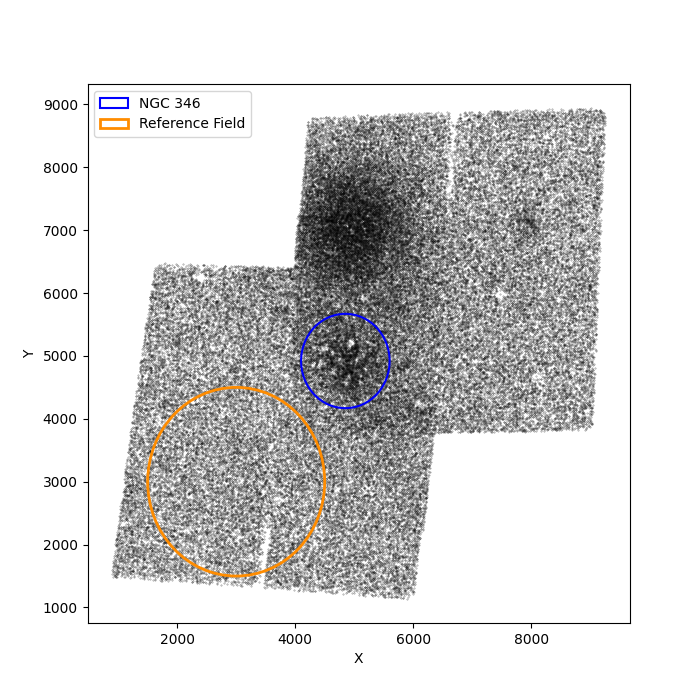

In [4]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.scatter(data_spatial['x'], data_spatial['y'], s=0.1, alpha=0.5, c='black') #c=data_spatial['F814W'], cmap = 'magma_r')
circle_NGC346 = plt.Circle(center_NGC346, radius_NGC346, color='blue', fill=False, linestyle='-', linewidth=1.5, label=r'NGC 346')
ax.add_patch(circle_NGC346)
circle_reference = plt.Circle(center_reference, radius_reference, color='darkorange', fill=False, linestyle='-', linewidth=2, label=r'Reference Field')
ax.add_patch(circle_reference)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [5]:
# compute the statistical error on the number of stars in the two clusters
N_NGC346 = len(data_NGC346_cluster)
N_reference = len(data_reference_field)
N_NGC346_error = np.sqrt(N_NGC346 - 1)
N_reference_error = np.sqrt(N_reference - 1)

print('Number of stars in NGC 346: ', N_NGC346, '+-', N_NGC346_error)
print('Number of stars in the reference field: ', N_reference, '+-', N_reference_error)


Number of stars in NGC 346:  6059 +- 77.83315488916018
Number of stars in the reference field:  11138 +- 105.53198567259123


### UV CMD for detection of UV-dim stars

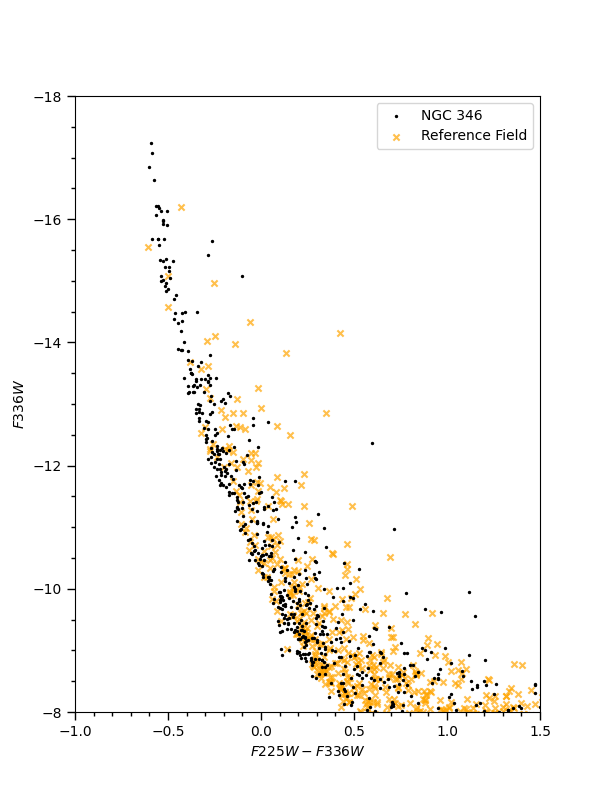

In [6]:
# UV-dim detection 
fig, ax = plt.subplots(figsize=(6, 8))
#plt.scatter(data['F225W']-data['F475W'], data['F814W'], s=0.1, alpha=0.1, c='black')
plt.scatter(data_NGC346_cluster['F225W']-data_NGC346_cluster['F336W'], data_NGC346_cluster['F336W'], s=2, c='black', label=r'NGC 346', zorder=2)
plt.scatter(data_reference_field['F225W']-data_reference_field['F336W'], data_reference_field['F336W'], s=20, alpha = 0.7, c='orange', marker='x', label=r'Reference Field', zorder=1)

ax.minorticks_on()
ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3)

plt.gca().invert_yaxis()
plt.xlim(-1,1.5)
plt.ylim(-8,-18)
plt.xlabel(r'$F225W-F336W$')
plt.ylabel(r'$F336W$')
plt.legend()
plt.show()

### Two colors diagram for UV-dim

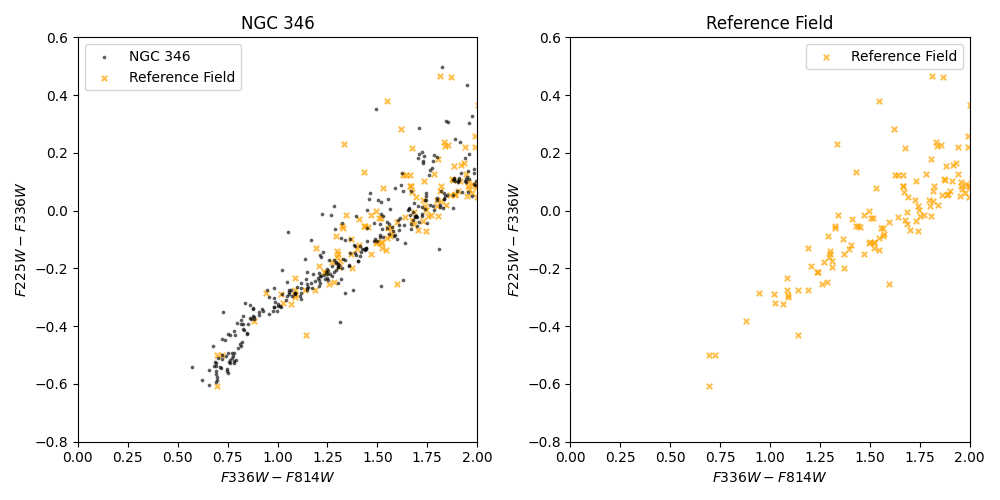

In [7]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(data_NGC346_cluster['F336W']-data_NGC346_cluster['F814W'], data_NGC346_cluster['F225W']-data_NGC346_cluster['F336W'], s=3, alpha=0.5, c='black', label='NGC 346',zorder=2)
plt.scatter(data_reference_field['F336W']-data_reference_field['F814W'], data_reference_field['F225W']-data_reference_field['F336W'], s=15, alpha=0.7, marker='x', c='orange', label=r'Reference Field',zorder=1)
plt.xlim(0, 2)
plt.ylim(-0.8, 0.6)
plt.xlabel(r'$F336W-F814W$')
plt.ylabel(r'$F225W-F336W$')
plt.legend()
plt.title('NGC 346')

plt.subplot(1,2,2)
plt.scatter(data_reference_field['F336W']-data_reference_field['F814W'], data_reference_field['F225W']-data_reference_field['F336W'], s=15, alpha=0.7, marker='x', c='orange', label=r'Reference Field')
plt.xlim(0, 2)
plt.ylim(-0.8, 0.6)
plt.xlabel(r'$F336W-F814W$')
plt.ylabel(r'$F225W-F336W$')
plt.legend()
plt.title('Reference Field')

plt.tight_layout()
plt.show()

Build a fiducial line in the two color diagram and then shift it to identify the region of possible UVdim stars.

In [8]:
import sys
import os

# set the path to the tools folder
module_path = '/Users/giadaaggio/Desktop/Thesis/TOTORO/CODES/tools'
sys.path.append(module_path)

from CMDAnalyzer import CMDFiducialSelector

<div class='alert alert-block alert-info'>
If you need to select the fiducial lines set <b><tt>select</b></tt> to <b><tt>True</b></tt>

In [9]:
select = False

if select == True:
    fiducial_uvdim = CMDFiducialSelector(
        data=data_NGC346_cluster, 
        color=data_NGC346_cluster['F336W']-data_NGC346_cluster['F814W'], 
        magnitude=data_NGC346_cluster['F225W']-data_NGC346_cluster['F336W'],
        x_label="F336W-F814W",  # Example color index
        y_label="F225W-F336W",  # Example magnitude
        output_file="/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/fiducial_uvdim.csv",
        xlim=(0,2),
        ylim=(-0.8,0.6),
        invert_yaxis=False,
    )

Plot once again the two color diagram with the original and shifted fiducial line to identify where the candidate UVdim are. Choose also a boundary in the horizontal direction to count only the stars with a color lower than the threshold.

In [10]:
fid_uvdim_line = pd.read_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/NGC346/fiducial_uvdim.csv')

# Shift the fiducial line in the vertical direction
fid_uvdim_line_shifted = fid_uvdim_line.copy()
fid_uvdim_line_shifted['Y'] = fid_uvdim_line_shifted['Y'] + 0.1

from scipy import interpolate

# Calculate the color for each star
x_stars = data_NGC346_cluster['F336W'] - data_NGC346_cluster['F814W']  # F336W - F814W for x-axis
y_stars = data_NGC346_cluster['F225W'] - data_NGC346_cluster['F336W']  # F225W - F336W for y-axis

# Create an interpolation function for the fiducial line (based on F336W - F814W for x-axis and F225W - F336W for y-axis)
interp_func = interpolate.interp1d(fid_uvdim_line_shifted['X'], fid_uvdim_line_shifted['Y'], bounds_error=False, fill_value=np.nan)

# Get the interpolated fiducial Y values for each star's x-coordinate
y_fiducial_interpolated = interp_func(x_stars)

# Now, select stars above the fiducial line
uv_dim_candidate = data_NGC346_cluster[
    (y_stars > y_fiducial_interpolated) &  # Stars above the shifted fiducial line
    (x_stars < 1.3)  # Optional condition, adjust as necessary
]

print('UV-dim candidates:', len(uv_dim_candidate))

# Select stars above the fiducial line belonging to the reference field
uv_dim_contamination = data_reference_field[
    (data_reference_field['F225W'] - data_reference_field['F336W'] > interp_func(data_reference_field['F336W'] - data_reference_field['F814W'])) &  # Stars above the shifted fiducial line
    (data_reference_field['F336W'] - data_reference_field['F814W'] < 1.3)  # Optional condition, adjust as necessary
]

if uv_dim_contamination.empty:
    print("No contamination detected in the UV-dim region.")
else:
    print('Contaminants:', len(uv_dim_contamination))

UV-dim candidates: 7
No contamination detected in the UV-dim region.


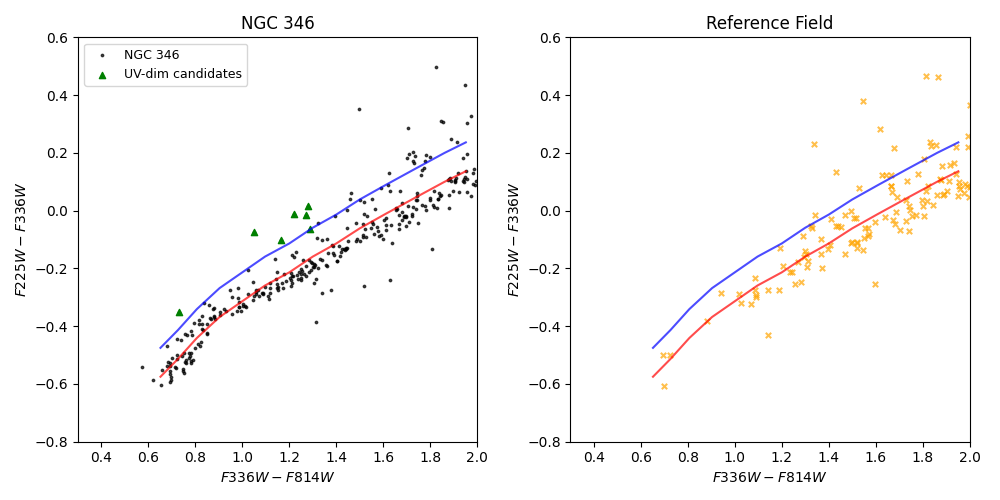

In [11]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(data_NGC346_cluster['F336W']-data_NGC346_cluster['F814W'], data_NGC346_cluster['F225W']-data_NGC346_cluster['F336W'], s=3, alpha=0.7, c='black', label='NGC 346')
plt.scatter(uv_dim_candidate['F336W']-uv_dim_candidate['F814W'], uv_dim_candidate['F225W']-uv_dim_candidate['F336W'], s=20, color='green', marker='^', label='UV-dim candidates')
plt.plot(fid_uvdim_line['X'], fid_uvdim_line['Y'], c='red', alpha=0.7)
plt.plot(fid_uvdim_line_shifted['X'], fid_uvdim_line_shifted['Y'], c='blue', alpha=0.7)
plt.xlim(0.3, 2)
plt.ylim(-0.8, 0.6)
plt.xlabel(r'$F336W-F814W$')
plt.ylabel(r'$F225W-F336W$')
plt.legend(fontsize=9, loc='upper left')
plt.title('NGC 346')

plt.subplot(1,2,2)
plt.scatter(data_reference_field['F336W']-data_reference_field['F814W'], data_reference_field['F225W']-data_reference_field['F336W'], s=15, alpha=0.7, marker='x', c='orange', label=r'Reference Field')
plt.plot(fid_uvdim_line['X'], fid_uvdim_line['Y'], c='red', alpha=0.7)
plt.plot(fid_uvdim_line_shifted['X'], fid_uvdim_line_shifted['Y'], c='blue', alpha=0.7)
plt.xlim(0.3, 2)
plt.ylim(-0.8, 0.6)
plt.xlabel(r'$F336W-F814W$')
plt.ylabel(r'$F225W-F336W$')
plt.title('Reference Field')

plt.tight_layout()
plt.show()

Plot the uv-dim candidates in the CMD

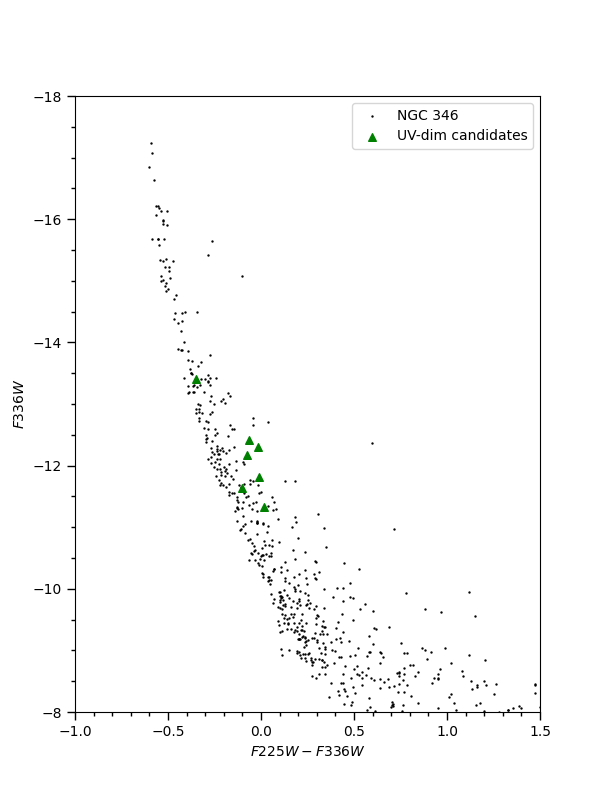

In [12]:
# UV-dim detection 
fig, ax = plt.subplots(figsize=(6, 8))
plt.scatter(data_NGC346_cluster['F225W']-data_NGC346_cluster['F336W'], data_NGC346_cluster['F336W'], s=0.5, c='black', label=r'NGC 346', zorder=2)
#plt.scatter(data_reference_field['F225W']-data_reference_field['F336W'], data_reference_field['F336W'], s=10, alpha = 0.5, c='orange', marker='x', label=r'Reference Field', zorder=1)
plt.scatter(uv_dim_candidate['F225W']-uv_dim_candidate['F336W'], uv_dim_candidate['F336W'], s=30, c='green', marker='^', label='UV-dim candidates', zorder=3)

ax.minorticks_on()
ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3)

plt.gca().invert_yaxis()
plt.xlim(-1,1.5)
plt.ylim(-8,-18)
plt.xlabel(r'$F225W-F336W$')
plt.ylabel(r'$F336W$')
plt.legend()
plt.show()

<div class='alert alert-block alert-success'>
In this case we have some strong UV-dim candidates, look at the paper of Milone to write conclusions and to clarify the region of interest. 
</div>